In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix,heatmap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

#### 1. Download the housing dataset referenced in the textbook on page 279, https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### 2. Pick a number of features that you think may be correlated and plot pairs of them to confirm that they are correlated.
Plotting features that are possibly correlated
Features chosen are CRIM, ZN, RM, AGE, TAX, PTRATIO AND LSTAT

In [ ]:
cols = ['CRIM', 'ZN', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']
scatterplotmatrix(df[cols].values, figsize=(10, 8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

As seen from the heatmap above, LSTAT and AGE showed the greatest correlation, while LSTAT and RM had the lowest correlation.

#### 3. Pick one feature that you think can be predicted by the other features in the dataset. The feature to be predicted needs to have numerical values.
Based on the heatmap obtained in the previous section, the feature to be predicted was chosen as LSTAT. 
Switching the positions of columns "LSTAT" and "MEDV" makes later steps easier

In [ ]:
columns_titles = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
              "TAX", "PTRATIO", "B", "MEDV", "LSTAT"]
df=df.reindex(columns=columns_titles)

In [ ]:
df

#### 4. Separate the data into training, validation, and test sets.
Spliting the dataset into training and testing sets; no validation set was created because it wasn't involved in any of the later steps.

In [ ]:
X = df.iloc[:, :-1].values
y = df['LSTAT'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 5. Apply various Scikit Learn regression methods to the data.
Using linear regression mode:

In [ ]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print(slr.coef_)

In [ ]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

#### 5. Apply various Scikit Learn regression methods to the data.
Using lasso mode: 

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

In [ ]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

#### 5. Apply various Scikit Learn regression methods to the data.
Using ridge mode:

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)

In [ ]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

#### 5. Apply various Scikit Learn regression methods to the data.
Using elastic net mode:

In [ ]:

elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elanet.fit(X_train, y_train)
y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)
print(elanet.coef_)

In [ ]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

#### 7. Repeat steps 3. to 6. for a second feature.
Picking a second feature

The second feature chosen to be predicted was CRIM.

Switching the positions of "CRIM" and "MEDV" columns make later steps easier. 

In [ ]:
columns_titles = ["ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
              "TAX", "PTRATIO", "B", "LSTAT", "MEDV", "CRIM"]
df=df.reindex(columns=columns_titles)

In [ ]:
df

Spliting the dataset into training and testing sets; no validation set was created because it wasn't involved in any of the later steps.

In [ ]:
X = df.iloc[:, :-1].values
y = df['CRIM'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Using linear regression mode:

In [ ]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print(slr.coef_)

In [ ]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Using lasso mode:

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

In [ ]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Using ridge mode:

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)

In [ ]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Using elastic net mode:

In [ ]:
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elanet.fit(X_train, y_train)
y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)
print(elanet.coef_)

In [ ]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

#### 6. Quantify how good a job each method did in predicting the value of the dependent variable (using your test data set). Discuss why you believe each method performed as it did.

#### Discussion
The following table summarizes the MSE values and R_squared values for the first feature, LSTAT, when randomstate for splitting data is 0 and 42, respectively. 

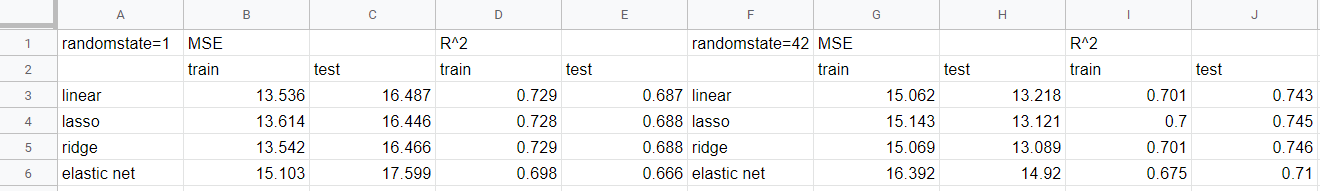

As seen from the table above, when random state is set to be 1, the MSE values for the testing set were consistently higher than those for the training set, which is an indicator that the training data was overfitted for all four regression modes. In contrast, when randomstate was increased to 42, the MSE values for the test data became smaller than those for the training set for all four methods used. This meant that the training data was not overfitted once the randomstate value was increased. R^2 values were calculated to quantify the accuracy of each prediction. As seen from the table above, linear, lasso and ridge regression modes yielded near identical R^2 values, while the R^2 value for elastic net was slightly lower. As discussed in the learning module, linear regression is the simplest mode, while lasso regression involves L1 regularization and thus leads to a sparse solution, ridge regression involves L2 regularization which significantly improves the stability of the model, and elastic net involves both L1 and L2 regularization. All the latter three options are more ideal for when the training data is multicollineary. However, since there wasn't much of a discrepency between the R^2 values obtained using these four methods, it should be appropriate to conclude that this training dataset is not multicollineary and can be predicted by all four modes.

This second table summarizes the same criteria for the second feature, CRIM. 

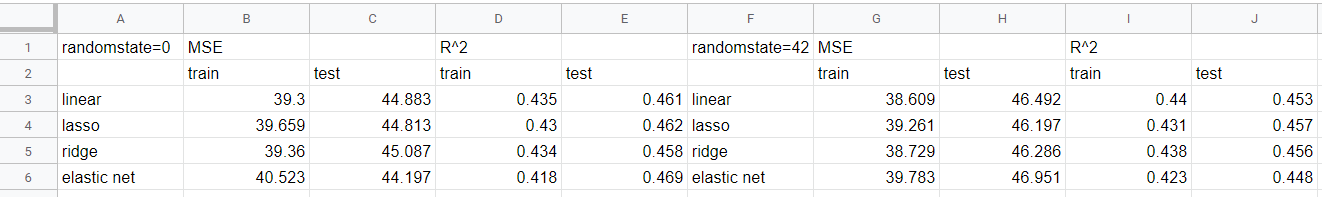

As seen from this table above, the value of randomstate during the data splitting step did not help with overfitting or accuracy of each prediction. Since none of the four modes used here yielded a high R^2 value, it should be appropriate to conclude that this training set was not linearly related and different regression methods should be used instead. 